# Simple Linear Regression

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [ ]:
#get the dataset from kaggle
os.system("kaggle datasets download -d burnoutminer/heights-and-weights-dataset")
os.system("unzip heights-and-weights-dataset.zip")

# Load into pandas


Dataset URL: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
License(s): other
heights-and-weights-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heights-and-weights-dataset.zip


replace SOCR-HeightWeight.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [22]:
df = pd.read_csv("SOCR-HeightWeight.csv"
                 )
print(df.head())

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [23]:
df['Height(cm)'] = df['Height(Inches)']*2.56

In [24]:
df['Weight(Kg)'] = df['Weight(Pounds)']*0.453

In [25]:
df.head()

,Index,Height(Inches),Weight(Pounds),Height(cm),Weight(Kg)
0,1,65.78331,112.9925,168.405274,51.185603
1,2,71.51521,136.4873,183.078938,61.828747
2,3,69.39874,153.0269,177.660774,69.321186
3,4,68.21660,142.3354,174.634496,64.477936
4,5,67.78781,144.2971,173.536794,65.366586


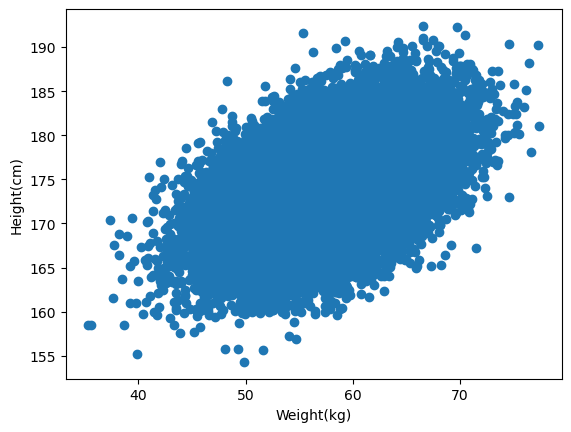

In [26]:
plt.scatter(df['Weight(Kg)'],df['Height(cm)'])
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')
plt.show()